## Crop Classification

#### Visualization of spation temporal input and expected outputs for crop type prediction models

# Crop type prediction Using 3d Unet

In [20]:
'''
conda deactivate
conda deactivate
cd stelar_3dunet/
source spt19/bin/activate
jupyter notebook
'''

'\nconda deactivate\nconda deactivate\ncd stelar_3dunet/\nsource spt19/bin/activate\njupyter notebook\n'

In [21]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)
from keras.models import load_model
import glob
from scipy.stats import mode


2.13.1
2.13.1


In [22]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2024-08-19 14:31:32.172614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-19 14:31:32.177688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-19 14:31:32.181540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [23]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score, f1_score, accuracy_score

In [28]:
import tifffile


In [33]:
input_img0 = np.load('/home/luser/UniBw-STELAR/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_00.npy')

input_img1 = np.load('/home/luser/stelar_3dunet/dataset/france2/processed_lai_npy/Q_LAI_2020_measure_00.npy')

In [34]:
input_img0.mean(), input_img0.std(), input_img0.min(), input_img0.max(), input_img0.shape, input_img0.dtype

(0.3785979806638143,
 0.42714643774303646,
 0.0,
 1.725,
 (10002, 10002),
 dtype('float64'))

In [35]:
input_img1.mean(), input_img1.std(), input_img1.min(), input_img1.max(), input_img1.shape, input_img1.dtype


(0.3785979806638143,
 0.42714643774303646,
 0.0,
 1.725,
 (10002, 10002),
 dtype('float64'))

In [17]:
import numpy as np

input_img0_float32 = input_img0.astype(np.float32)
print(input_img0_float32.std())


0.42715055


In [11]:
np.unique(input_img0)

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ,
       1.125, 1.15 , 1.175, 1.2  , 1.225, 1.25 , 1.275, 1.3  , 1.325,
       1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ,
       1.575, 1.6  , 1.625, 1.65 , 1.675, 1.7  , 1.725], dtype=float16)

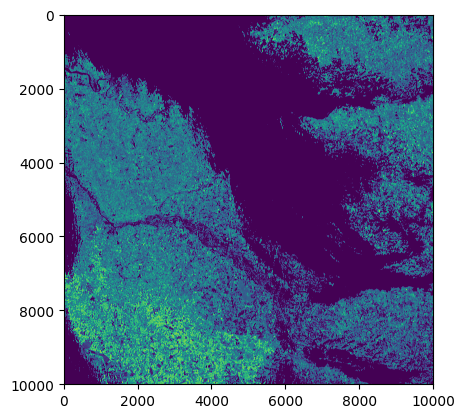

In [9]:
plt.imshow(input_img0)

## Vista Crop Types

In [5]:

vista_crop_dict = { 0:'NA' , 1: 'ALFALFA', 2: 'BEET', 3: 'CLOVER', 4: 'FLAX', 5: 'FLOWERING_LEGUMES', 6: 'FLOWERS', 7: 'FOREST', 8: 'GRAIN_MAIZE', 9: 'GRASSLAND', 10: 'HOPS', 11: 'LEGUMES', 12: 'VISTA_NA', 13: 'PERMANENT_PLANTATIONS', 14: 'PLASTIC', 15: 'POTATO', 16: 'PUMPKIN', 17: 'RICE', 18: 'SILAGE_MAIZE', 19: 'SOY', 20: 'SPRING_BARLEY', 21: 'SPRING_OAT', 22: 'SPRING_OTHER_CEREALS', 23: 'SPRING_RAPESEED', 24: 'SPRING_RYE', 25: 'SPRING_SORGHUM', 26: 'SPRING_SPELT', 27: 'SPRING_TRITICALE', 28: 'SPRING_WHEAT', 29: 'SUGARBEET', 30: 'SUNFLOWER', 31: 'SWEET_POTATOES', 32: 'TEMPORARY_GRASSLAND', 33: 'WINTER_BARLEY', 34: 'WINTER_OAT', 35: 'WINTER_OTHER_CEREALS', 36: 'WINTER_RAPESEED', 37: 'WINTER_RYE', 38: 'WINTER_SORGHUM', 39: 'WINTER_SPELT', 40: 'WINTER_TRITICALE', 41: 'WINTER_WHEAT'}

chosen_crop_types_list_list = [[1, 2, 3], [4, 5, 7], [8,  9, 10], [11, 12, 13], [14, 15, 16], [18, 19, 20], [21, 23, 27], [28, 30, 32], [33, 34, 35], [36, 37, 40], [37, 40, 41]]


In [6]:
# load all the files in /home/luser/stelar_3dunet/ensamble_results/iou_f1_class_weights/cloud_interpol

cloud_interpol = True
if cloud_interpol:
    ground_truth_filepaths = glob.glob('/home/luser/stelar_3dunet/ensamble_results/iou_f1_class_weights/cloud_interpol/g*.tif')
    ground_truth_filepaths.sort()

    predictions_filepaths = glob.glob('/home/luser/stelar_3dunet/ensamble_results/iou_f1_class_weights/cloud_interpol/p*.tif')
    predictions_filepaths.sort()
else:
    ground_truth_filepaths = glob.glob('/home/luser/stelar_3dunet/ensamble_results/iou_f1_class_weights/no_cloud_interpol/g*.tif')
    ground_truth_filepaths.sort()

    predictions_filepaths = glob.glob('/home/luser/stelar_3dunet/ensamble_results/iou_f1_class_weights/no_cloud_interpol/p*.tif')
    predictions_filepaths.sort()

all_test_ground_truth = []
all_test_prediction = []
for ground_truth_address, prediction_address in zip(ground_truth_filepaths, predictions_filepaths):
    ground_truth = io.imread(ground_truth_address)
    prediction = io.imread(prediction_address)
    all_test_ground_truth.append(ground_truth)
    all_test_prediction.append(prediction)  
all_test_ground_truth = np.array(all_test_ground_truth)
all_test_prediction = np.array(all_test_prediction)

print("all_test_ground_truth.shape, all_test_prediction.shape", all_test_ground_truth.shape, all_test_prediction.shape)

all_test_ground_truth.shape, all_test_prediction.shape (1771, 64, 64) (1771, 64, 64)


In [7]:
def calculate_iou(ground_truth, prediction):
    ground_truth = ground_truth.astype(np.bool_)
    prediction = prediction.astype(np.bool_)
    intersection = np.logical_and(ground_truth, prediction)
    union = np.logical_or(ground_truth, prediction)
    if np.sum(union) == 0:
        iou = 0
    else:
        iou = np.sum(intersection) / np.sum(union)    
    return iou

def calculate_f1_score(ground_truth, prediction):
    ground_truth = ground_truth.astype(np.bool_)
    prediction = prediction.astype(np.bool_)
    tp = np.sum(np.logical_and(prediction, ground_truth))
    fp = np.sum(np.logical_and(prediction, np.logical_not(ground_truth)))
    fn = np.sum(np.logical_and(np.logical_not(prediction), ground_truth))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score


## Quantitative Analysis : Crop prediction

### Sampled training data analysis

In [8]:
crop_types_all_list = [ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40, 41]

all_unique_crop_types = np.array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40, 41]).astype(np.uint8)


In [9]:
# For permanent plantations no: 13 in the test set
all_crops_iou_distributions = []
for unique in all_unique_crop_types[1:]:
    each_iou_distribution = []
    for i in range(all_test_ground_truth.shape[0]):
        ground_truth, prediction = all_test_ground_truth[i].copy(), all_test_prediction[i].copy()
        ground_truth[ground_truth!=unique]=0
        prediction[prediction!=unique]=0
        iou = calculate_iou(ground_truth, prediction)
        each_iou_distribution.append(iou)
    all_crops_iou_distributions.append(each_iou_distribution)

In [10]:
len(all_crops_iou_distributions), len(all_crops_iou_distributions[0]), len(all_crops_iou_distributions[2])

(31, 1771, 1771)

## Intersection Over Union

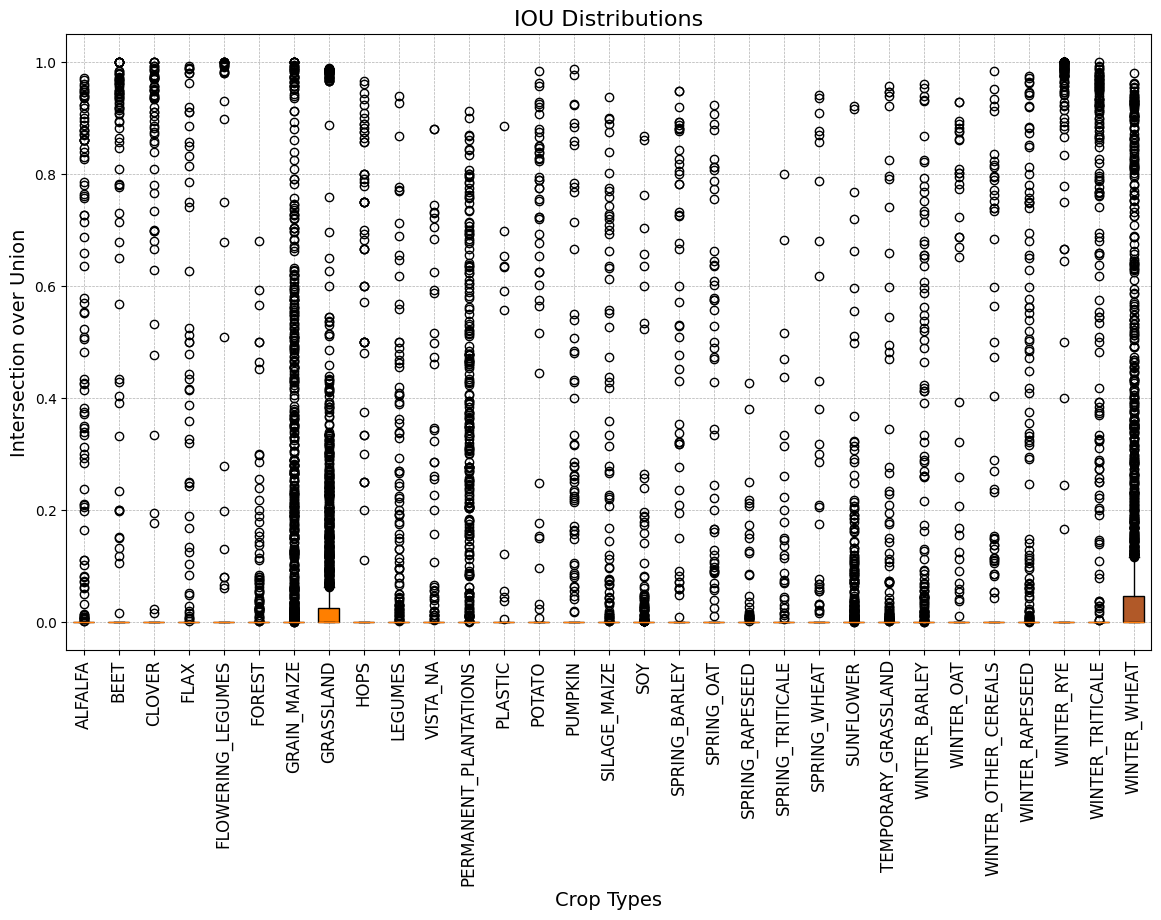

In [11]:
import matplotlib.pyplot as plt

# Example data
data = all_crops_iou_distributions
crop_types = [vista_crop_dict[element] for element in all_unique_crop_types]

# Create a new figure with a larger size
plt.figure(figsize=(14, 8))  # Increase figure size to make more room for x-ticks

# Create box plot with broader boxes
box = plt.boxplot(data, patch_artist=True, widths=0.6)  # Adjust widths to make boxes broader

# Customize box colors
colors = plt.cm.Paired(range(len(data)))  # Using a colormap for distinct colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize the rest of the plot for better visibility
plt.title('IOU Distributions', fontsize=16)
plt.xlabel('Crop Types', fontsize=14)
plt.ylabel('Intersection over Union', fontsize=14)

# Set custom x-tick positions to spread them out
positions = range(1, len(data) + 1)
plt.xticks(positions, crop_types[1:], rotation=90, fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.5)
if cloud_interpol:
    plt.savefig('/home/luser/stelar_3dunet/showcase/iou/exp2_iou_cloud_interpol.png', bbox_inches='tight')
else:
    plt.savefig('/home/luser/stelar_3dunet/showcase/iou/exp2_iou_no_cloud_interpol.png', bbox_inches='tight')

# Display the plot
plt.show()


## F1 Score

In [12]:
# For permanent plantations no: 13 in the test set
all_crops_f1_distributions = []
for unique in all_unique_crop_types[1:]:
    each_f1_distribution = []
    for i in range(all_test_ground_truth.shape[0]):
        ground_truth, prediction = all_test_ground_truth[i].copy(), all_test_prediction[i].copy()
        
        ground_truth[ground_truth!=unique]=0
        prediction[prediction!=unique]=0
        
        f1 = calculate_f1_score(ground_truth, prediction)
        
        each_f1_distribution.append(f1)
        #print("Intersection over union", iou)
    all_crops_f1_distributions.append(each_f1_distribution)

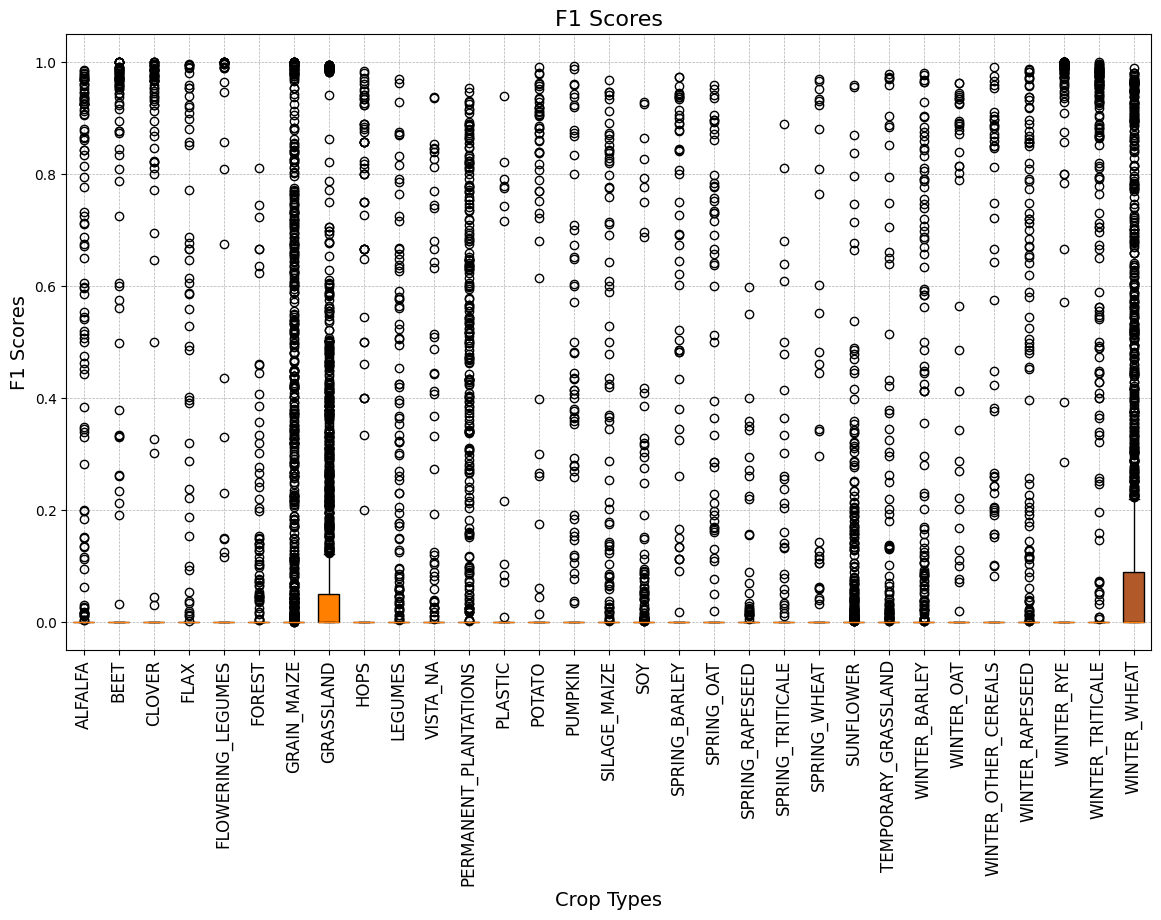

In [13]:
import matplotlib.pyplot as plt

# Example data
data = all_crops_f1_distributions
crop_types = [vista_crop_dict[element] for element in all_unique_crop_types]

# Create a new figure with a larger size
plt.figure(figsize=(14, 8))  # Increase figure size to make more room for x-ticks

# Create box plot with broader boxes
box = plt.boxplot(data, patch_artist=True, widths=0.6)  # Adjust widths to make boxes broader

# Customize box colors
colors = plt.cm.Paired(range(len(data)))  # Using a colormap for distinct colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize the rest of the plot for better visibility
plt.title('F1 Scores', fontsize=16)
plt.xlabel('Crop Types', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)

# Set custom x-tick positions to spread them out
positions = range(1, len(data) + 1)
plt.xticks(positions, crop_types[1:], rotation=90, fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.5)
if cloud_interpol:
    plt.savefig('/home/luser/stelar_3dunet/showcase/f1_score/exp2_f1_cloud_interpol.png', bbox_inches='tight')
else:
    plt.savefig('/home/luser/stelar_3dunet/showcase/f1_score/exp2_f1_no_cloud_interpol.png', bbox_inches='tight')

# Display the plot
plt.show()


# Crop type respresentaions in the training data